## Neural Networks - NLP - CNN

### Procesamiento - Tokenizer

In [6]:
import numpy as np
import pandas as pd

import matplotlib # Para ver la versión
import matplotlib.pyplot as plt

import tensorflow as tf # Para ver la versión
import keras # Para ver la versión

from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import sklearn # Para ver la versión

from sklearn.metrics import confusion_matrix

In [7]:
# Versiones

print(f"numpy=={np.__version__}")
print(f"pandas=={pd.__version__}")
print(f"matplotlib=={matplotlib.__version__}")
print(f"tensorflow=={tf.__version__}")
print(f"keras=={keras.__version__}")
print(f"scikit-learn=={sklearn.__version__}")

# Unidades de procesamiento
print("\nUnidades de procesamiento:")
for device in tf.config.list_physical_devices():
    print(f"\t- {device.name}")

numpy==1.26.4
pandas==1.2.4
matplotlib==3.4.2
tensorflow==2.17.0
keras==3.5.0
scikit-learn==1.5.1

Unidades de procesamiento:
	- /physical_device:CPU:0


In [8]:
frases = np.array(["The sun is shining",
                   "The weather is sweet", 
                   "The sun is shining, the weather is sweet, and one and one is two"])

In [9]:
num_words = len(set(" ".join(frases).split()))
num_words

12

In [10]:
tokenizer = Tokenizer(num_words = num_words)
tokenizer.fit_on_texts(texts = frases)

sequences = tokenizer.texts_to_sequences(frases)

print(sequences)

[[2, 3, 1, 4], [2, 5, 1, 6], [2, 3, 1, 4, 2, 5, 1, 6, 7, 8, 7, 8, 1, 9]]


In [ ]:
# dimensionalidad alta

# 

In [17]:
tokenizer.word_index

{'is': 1,
 'the': 2,
 'sun': 3,
 'shining': 4,
 'weather': 5,
 'sweet': 6,
 'and': 7,
 'one': 8,
 'two': 9}

In [18]:
maxlen = max([len(x.split()) for x in frases])
maxlen

14

In [19]:
data = pad_sequences(sequences = sequences, maxlen = maxlen, padding = "pre")

data

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 1, 4],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 5, 1, 6],
       [2, 3, 1, 4, 2, 5, 1, 6, 7, 8, 7, 8, 1, 9]])

In [20]:
data = pad_sequences(sequences = sequences, maxlen = maxlen, padding = "post")

data

array([[2, 3, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [2, 5, 1, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [2, 3, 1, 4, 2, 5, 1, 6, 7, 8, 7, 8, 1, 9]])

In [21]:
data = pad_sequences(sequences = sequences, maxlen = maxlen + 1, padding = "pre")

data

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 1, 4],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 5, 1, 6],
       [0, 2, 3, 1, 4, 2, 5, 1, 6, 7, 8, 7, 8, 1, 9]])

### CNN

In [47]:
import re

In [72]:
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Dense, Input, Embedding, Dropout
from tensorflow.keras.layers import MaxPooling1D, GlobalMaxPool1D, Conv1D
from tensorflow.keras.models import Sequential

In [53]:
df = pd.read_csv("../Data/spam.csv", encoding = "ISO-8859-1")

df.head()

,label,text
0,no spam,Subject: enron methanol ; meter # : 988291\r\n...
1,no spam,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,no spam,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,no spam,Subject: re : indian springs\r\nthis deal is t...


In [54]:
def eliminar_puntuacion(texto):
    texto = re.sub(r'[^\w\s]', '', texto)
    texto = texto.lower()
    return texto

df['text'] = df['text'].apply(eliminar_puntuacion)

In [55]:
df["label"] = df["label"].map({"no spam" : 0, "spam" : 1})

df

,label,text
0,0,subject enron methanol meter 988291\r\nthis...
1,0,subject hpl nom for january 9 2001\r\n see at...
2,0,subject neon retreat\r\nho ho ho we re aroun...
3,1,subject photoshop windows office cheap mai...
4,0,subject re indian springs\r\nthis deal is to ...
...,...,...
5166,0,subject put the 10 on the ft\r\nthe transport ...
5167,0,subject 3 4 2000 and following noms\r\nhpl c...
5168,0,subject calpine daily gas nomination\r\n\r\n\r...
5169,0,subject industrial worksheets for august 2000 ...


### Train, Test

In [56]:
X = df["text"]
y = df["label"]

print(X.shape, y.shape)

(5171,) (5171,)


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (3619,), (3619,)
Test: (1552,), (1552,)


### Tokenizer

In [58]:
tokenizer = Tokenizer(num_words = 5_000)
tokenizer.fit_on_texts(X_train)

sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

In [59]:
valores = [len(x) for x in sequences_train]

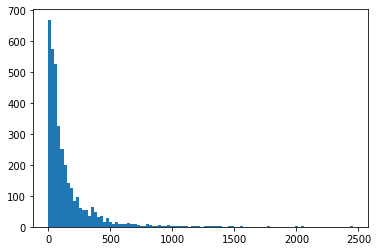

In [60]:
plt.hist(valores, bins = 100);

In [61]:
# print(tokenizer.word_index)

print(f"Tokens: {len(tokenizer.word_index)}")

Tokens: 47365


In [62]:
data_train = pad_sequences(sequences = sequences_train, maxlen = 500)

print(f"Train: {data_train.shape}")

Train: (3619, 500)


In [63]:
data_test = pad_sequences(sequences = sequences_test, maxlen = 500)

print(f"Test: {data_test.shape}")

Test: (1552, 500)


In [ ]:
# ['odiar', 'detestar', 'limpiar']

# [0.5, 0.3]
# [0.4, 0.2]

In [64]:
(data_train.shape[1], )

(500,)

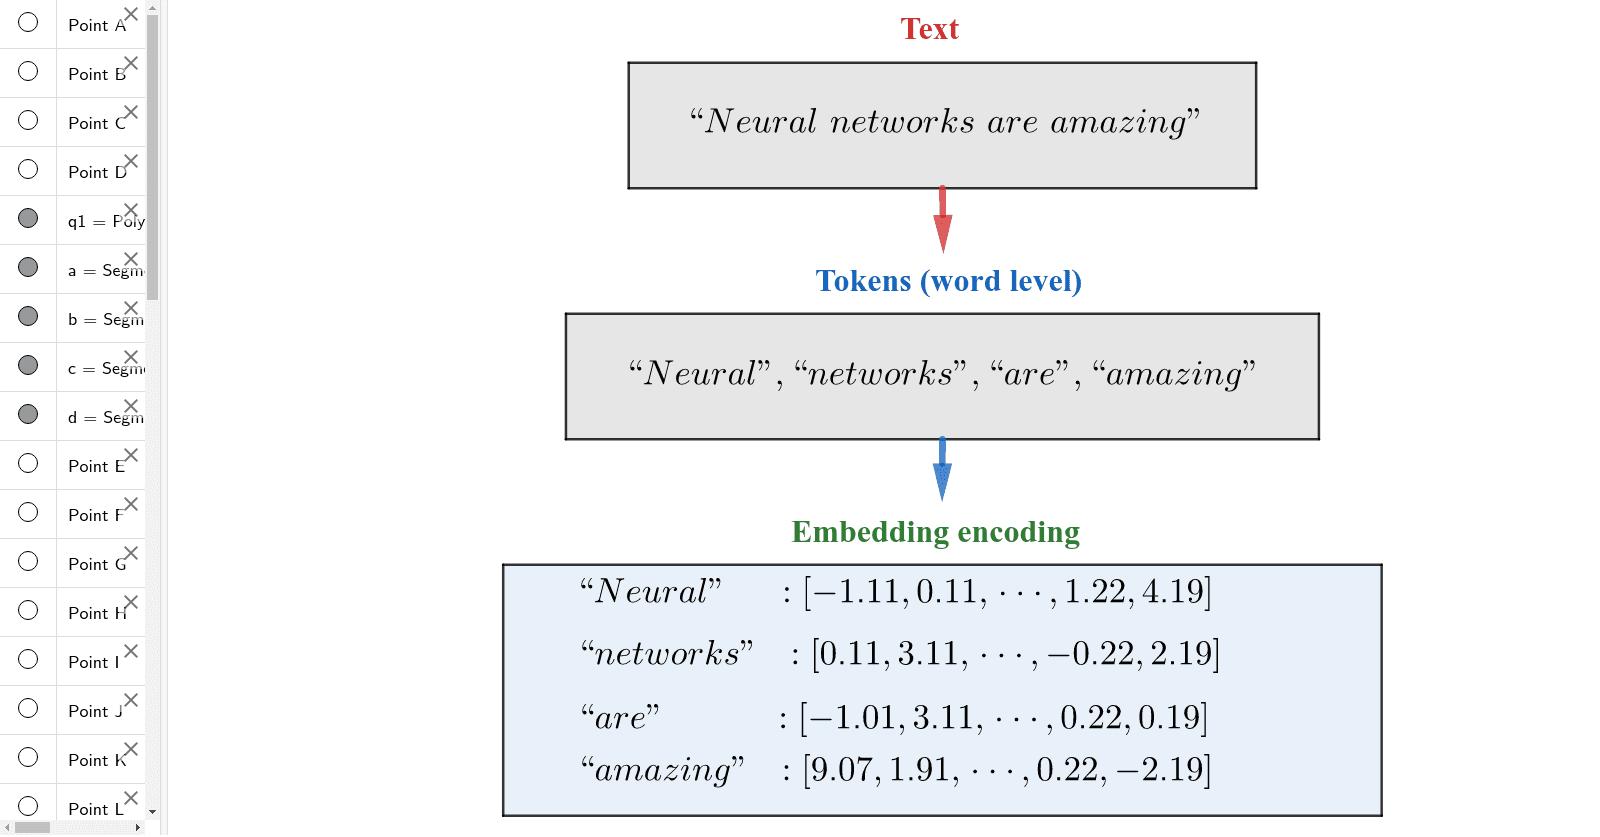

### Model

In [73]:
model = Sequential()

# Capa de Entrada
model.add(Input(shape = (data_train.shape[1], )))

# Embedding
model.add(Embedding(input_dim = len(tokenizer.word_index) + 1, output_dim = 20))

# Convolucionales + Pooling (1D)
model.add(Conv1D(filters = 32, kernel_size = 3, activation = "relu"))
model.add(MaxPooling1D(3))

model.add(Conv1D(filters = 64, kernel_size = 3, activation = "relu"))
model.add(MaxPooling1D(3))

model.add(Conv1D(filters = 128, kernel_size = 3, activation = "relu"))
model.add(GlobalMaxPool1D())

# Capa de Salida

model.add(Dense(units = 100, activation = "relu"))
model.add(Dropout(0.4))

model.add(Dense(units = 1, activation = "sigmoid"))

model.compile(optimizer = "adam",
              loss      = "binary_crossentropy",
              metrics   = ["accuracy"])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 500, 20)        │       947,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 498, 32)        │         1,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 166, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 164, 64)        │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 54, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 52, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_2          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        12,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 993,185 (3.79 MB)

 Trainable params: 993,185 (3.79 MB)

 Non-trainable params: 0 (0.00 B)

In [74]:
history = model.fit(x = data_train, y = y_train,
                    validation_data = (data_test, y_test), epochs = 10)

Epoch 1/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.6836 - loss: 0.5450 - val_accuracy: 0.9240 - val_loss: 0.2488
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.9537 - loss: 0.1653 - val_accuracy: 0.9433 - val_loss: 0.1476
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9797 - loss: 0.0680 - val_accuracy: 0.9588 - val_loss: 0.1053
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9889 - loss: 0.0336 - val_accuracy: 0.9626 - val_loss: 0.1110
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9931 - loss: 0.0215 - val_accuracy: 0.9601 - val_loss: 0.1625
Epoch 6/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.9944 - loss: 0.0161 - val_accuracy: 0.9639 - val_loss: 0.1621
Epoch 7/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.9946 - loss: 0.0150 - val_accuracy: 0.9568 - val_loss: 0.2222
Epoch 8/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.9938 - loss: 0.0164 - val_accu

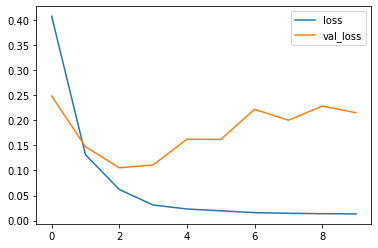

In [75]:
# loss
plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.legend()
plt.show()

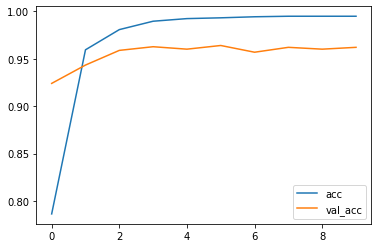

In [76]:
# accuracy
plt.plot(history.history["accuracy"], label = "acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")
plt.legend()
plt.show()

In [ ]:
# Predicciones
y_hat = model.predict(data_test)
y_hat = [0 if x < 0.5 else 1 for x in y_hat]

y_hat

In [78]:
confusion_matrix(y_test, y_hat)

array([[1058,   44],
       [  15,  435]])

In [ ]:
################################################################################################################################